In [1]:
# Upload file interactively in Colab (pick student_feedback.csv)
from google.colab import files
uploaded = files.upload()  # Choose student_feedback.csv from your computer
print("Uploaded files:", list(uploaded.keys()))



Saving student_feedback.csv to student_feedback.csv
Uploaded files: ['student_feedback.csv']


In [2]:
# Cell 1: install required libraries (Colab)
!pip install --quiet pandas matplotlib seaborn
!pip install --quiet wordcloud
# NLTK/TextBlob not required since there are no comments
print("Libraries installed.")

Libraries installed.


In [3]:
# Cell 2: load the uploaded CSV
import pandas as pd

# If you used files.upload(), the uploaded dict is available as 'uploaded' (see previous cell).
# If not, change the file name string below to 'student_feedback.csv' and ensure it exists in Files panel.
filename = "student_feedback.csv"
df = pd.read_csv(filename)
print("Loaded:", filename, "with shape", df.shape)
df.head()


Loaded: student_feedback.csv with shape (1001, 10)


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [4]:
# Cell 3: cleaning column names and drop index-like columns
# Replace spaces with underscores and lowercase column names
df.columns = [c.strip().replace(' ', '_').lower() for c in df.columns]

# Drop a stray index column often named 'unnamed: 0' if present
if 'unnamed:_0' in df.columns:
    df = df.drop(columns=['unnamed:_0'])
if 'unnamed:0' in df.columns:
    df = df.drop(columns=['unnamed:0'])

# Show final columns and first rows
print("Columns:", list(df.columns))
print("Shape after cleanup:", df.shape)
df.head()


Columns: ['student_id', 'well_versed_with_the_subject', 'explains_concepts_in_an_understandable_way', 'use_of_presentations', 'degree_of_difficulty_of_assignments', 'solves_doubts_willingly', 'structuring_of_the_course', 'provides_support_for_students_going_above_and_beyond', 'course_recommendation_based_on_relevance']
Shape after cleanup: (1001, 9)


,student_id,well_versed_with_the_subject,explains_concepts_in_an_understandable_way,use_of_presentations,degree_of_difficulty_of_assignments,solves_doubts_willingly,structuring_of_the_course,provides_support_for_students_going_above_and_beyond,course_recommendation_based_on_relevance
0,340,5,2,7,6,9,2,1,8
1,253,6,5,8,6,2,1,2,9
2,680,7,7,6,5,4,2,3,1
3,806,9,6,7,1,5,9,4,6
4,632,8,10,8,4,6,6,9,9


In [5]:
# Cell 4: check for nulls and types
print("Missing values per column:")
print(df.isnull().sum())
print("\nData types:")
print(df.dtypes)


Missing values per column:
student_id                                              0
well_versed_with_the_subject                            0
explains_concepts_in_an_understandable_way              0
use_of_presentations                                    0
degree_of_difficulty_of_assignments                     0
solves_doubts_willingly                                 0
structuring_of_the_course                               0
provides_support_for_students_going_above_and_beyond    0
course_recommendation_based_on_relevance                0
dtype: int64

Data types:
student_id                                              int64
well_versed_with_the_subject                            int64
explains_concepts_in_an_understandable_way              int64
use_of_presentations                                    int64
degree_of_difficulty_of_assignments                     int64
solves_doubts_willingly                                 int64
structuring_of_the_course                            

In [6]:
# Cell 5: convert rating columns to numeric (coerce errors)
# We will assume 'student_id' is an identifier and not a rating.
cols = [c for c in df.columns if c != 'student_id']

for c in cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

print("After conversion, missing values per column:")
print(df[cols].isnull().sum())
df.describe().T


After conversion, missing values per column:
well_versed_with_the_subject                            0
explains_concepts_in_an_understandable_way              0
use_of_presentations                                    0
degree_of_difficulty_of_assignments                     0
solves_doubts_willingly                                 0
structuring_of_the_course                               0
provides_support_for_students_going_above_and_beyond    0
course_recommendation_based_on_relevance                0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
student_id,1001.0,500.000000,289.108111,0.0,250.0,500.0,750.0,1000.0
well_versed_with_the_subject,1001.0,7.497502,1.692998,5.0,6.0,8.0,9.0,10.0
explains_concepts_in_an_understandable_way,1001.0,6.081918,2.597168,2.0,4.0,6.0,8.0,10.0
use_of_presentations,1001.0,5.942058,1.415853,4.0,5.0,6.0,7.0,8.0
degree_of_difficulty_of_assignments,1001.0,5.430569,2.869046,1.0,3.0,5.0,8.0,10.0
solves_doubts_willingly,1001.0,5.474525,2.874648,1.0,3.0,6.0,8.0,10.0
structuring_of_the_course,1001.0,5.636364,2.920212,1.0,3.0,6.0,8.0,10.0
provides_support_for_students_going_above_and_beyond,1001.0,5.662338,2.891690,1.0,3.0,6.0,8.0,10.0
course_recommendation_based_on_relevance,1001.0,5.598402,2.886617,1.0,3.0,6.0,8.0,10.0


In [7]:
# Cell 6: summary stats for all rating columns
cols = [c for c in df.columns if c != 'student_id']

print("Summary statistics (mean, std, min, max):")
display(df[cols].describe().T)


Summary statistics (mean, std, min, max):


,count,mean,std,min,25%,50%,75%,max
well_versed_with_the_subject,1001.0,7.497502,1.692998,5.0,6.0,8.0,9.0,10.0
explains_concepts_in_an_understandable_way,1001.0,6.081918,2.597168,2.0,4.0,6.0,8.0,10.0
use_of_presentations,1001.0,5.942058,1.415853,4.0,5.0,6.0,7.0,8.0
degree_of_difficulty_of_assignments,1001.0,5.430569,2.869046,1.0,3.0,5.0,8.0,10.0
solves_doubts_willingly,1001.0,5.474525,2.874648,1.0,3.0,6.0,8.0,10.0
structuring_of_the_course,1001.0,5.636364,2.920212,1.0,3.0,6.0,8.0,10.0
provides_support_for_students_going_above_and_beyond,1001.0,5.662338,2.891690,1.0,3.0,6.0,8.0,10.0
course_recommendation_based_on_relevance,1001.0,5.598402,2.886617,1.0,3.0,6.0,8.0,10.0


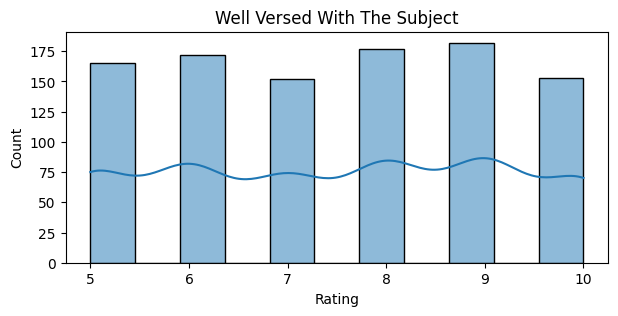

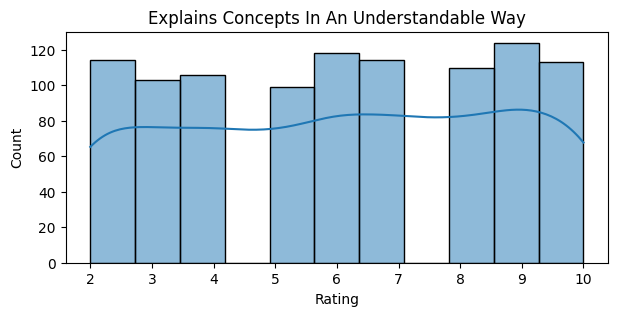

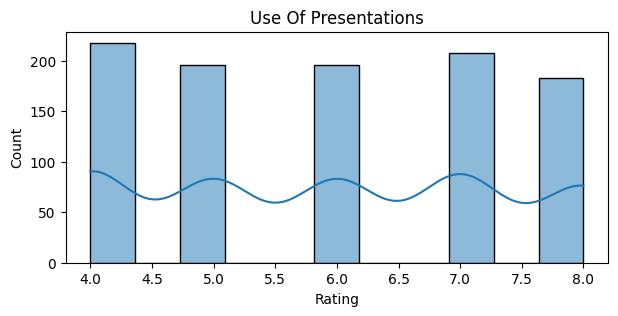

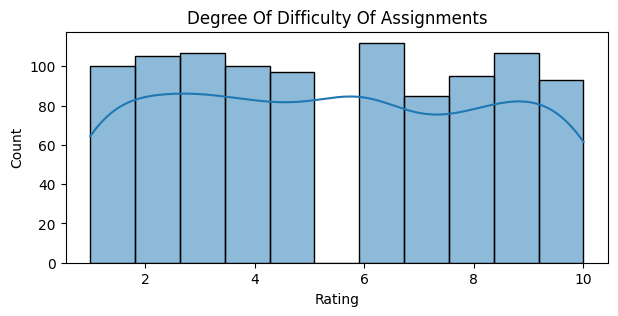

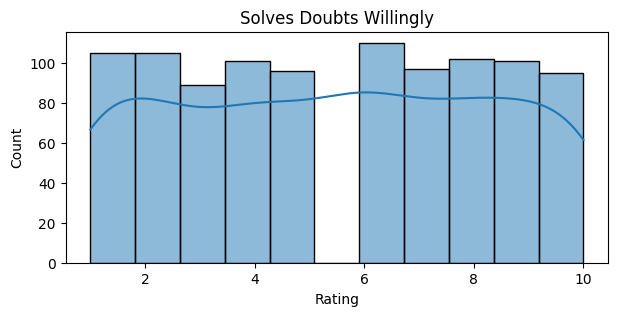

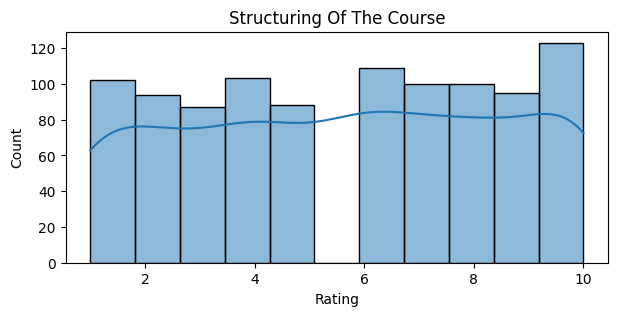

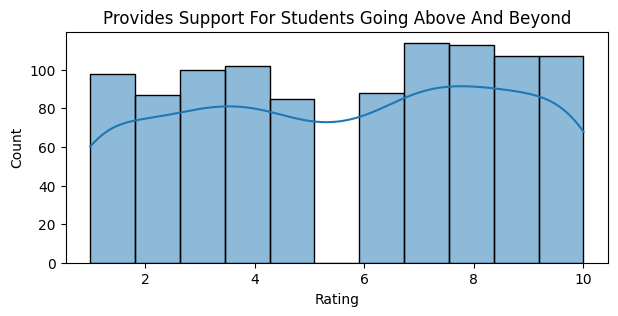

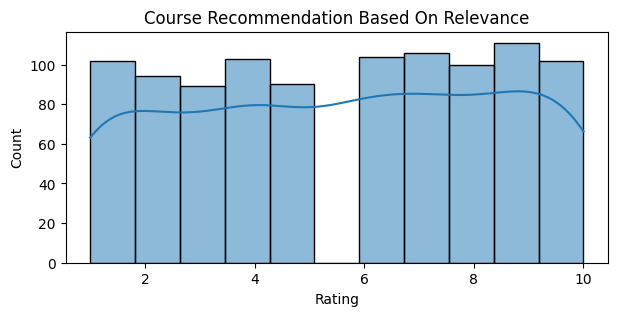

In [8]:
# Cell 7: histograms for each rating column
import matplotlib.pyplot as plt
import seaborn as sns

cols = [c for c in df.columns if c != 'student_id']
for c in cols:
    plt.figure(figsize=(7,3))
    sns.histplot(df[c].dropna(), kde=True)
    plt.title(c.replace('_',' ').title())
    plt.xlabel("Rating")
    plt.show()


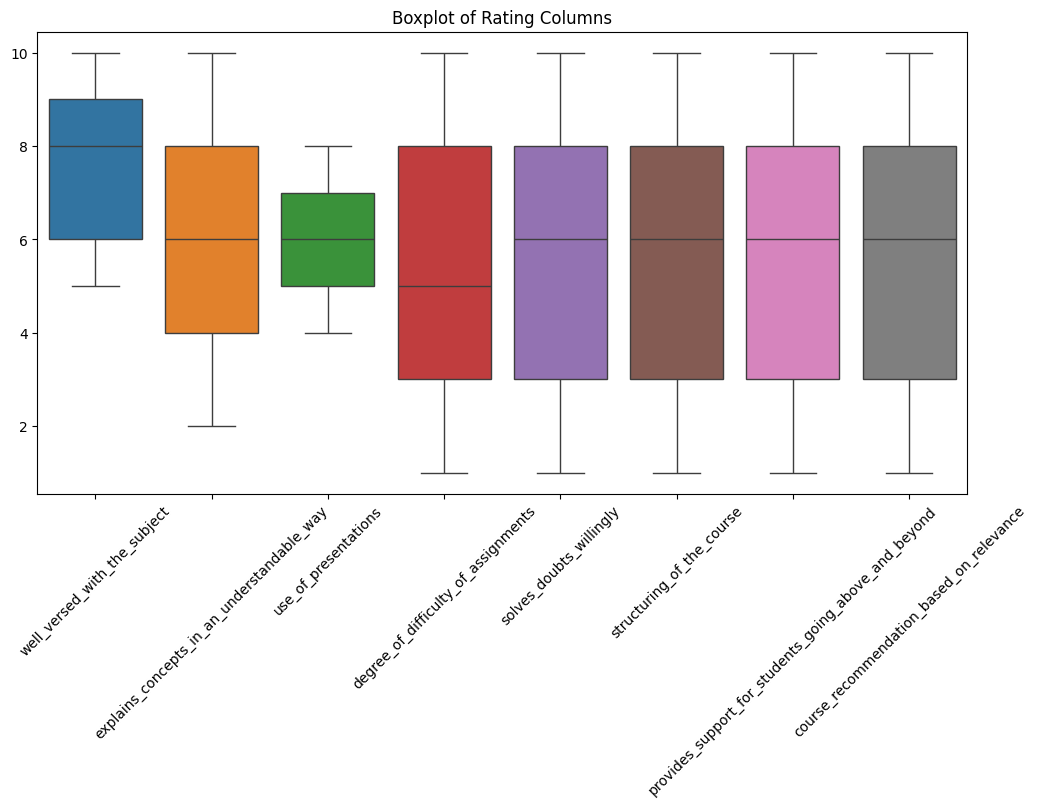

In [9]:
# Cell 8: combined boxplot for comparison
plt.figure(figsize=(12,6))
sns.boxplot(data=df[cols])
plt.xticks(rotation=45)
plt.title("Boxplot of Rating Columns")
plt.show()


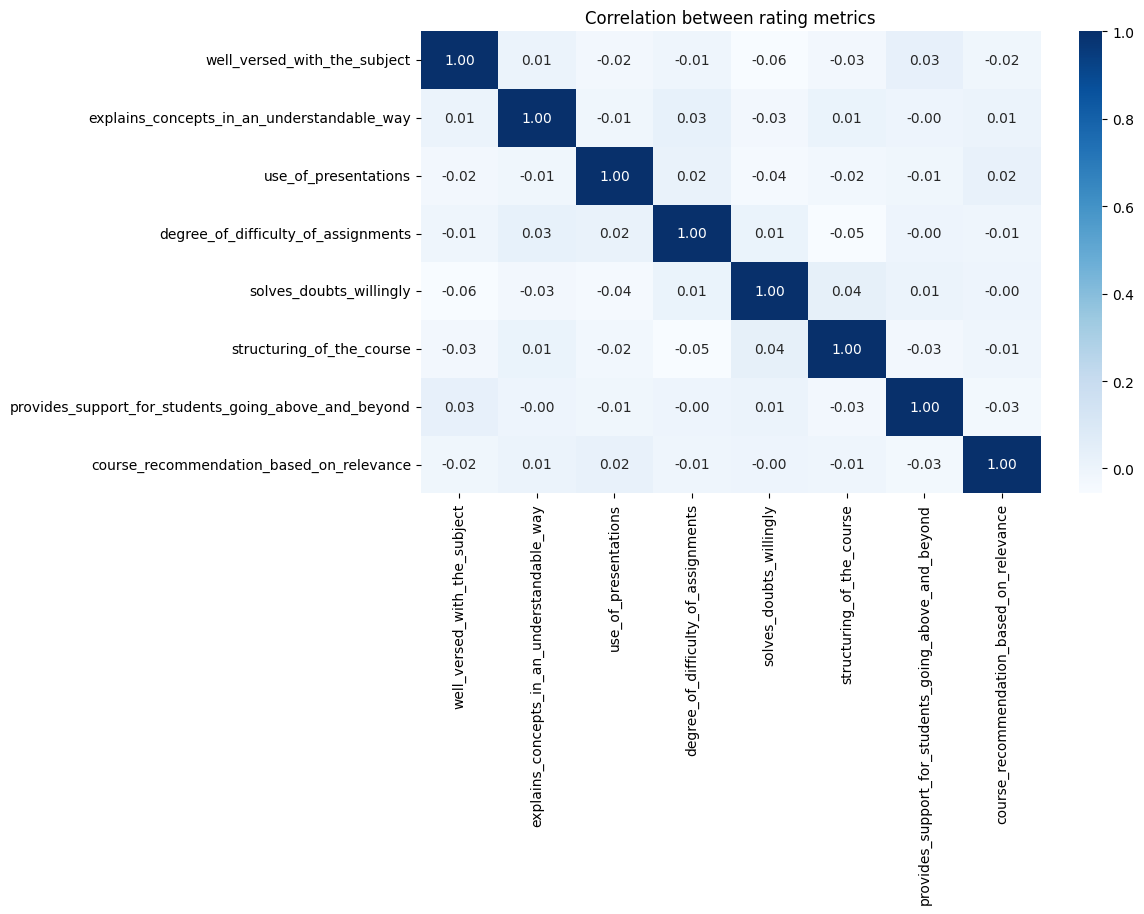

In [10]:
# Cell 9: correlation heatmap
plt.figure(figsize=(10,6))
corr = df[cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues")
plt.title("Correlation between rating metrics")
plt.show()


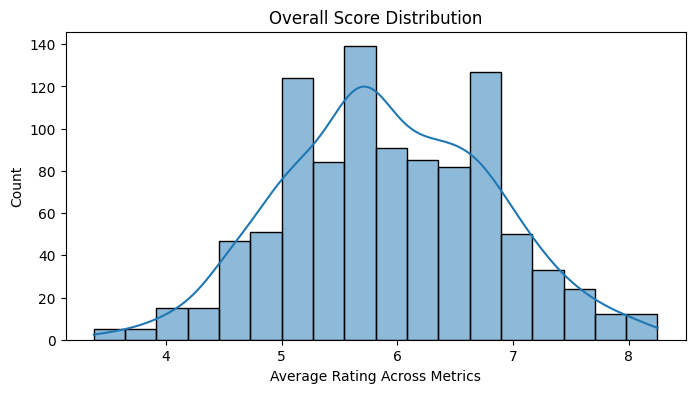

Top 5 students by overall score:


,student_id,overall_score
199,770,8.250
110,188,8.250
692,238,8.250
580,78,8.125
658,269,8.125



Bottom 5 students by overall score:


,student_id,overall_score
644,281,3.375
592,54,3.375
743,724,3.500
612,73,3.625
285,450,3.625


In [11]:
# Cell 10: overall score per student (mean of rating columns)
df['overall_score'] = df[cols].mean(axis=1)

plt.figure(figsize=(8,4))
sns.histplot(df['overall_score'].dropna(), kde=True)
plt.title("Overall Score Distribution")
plt.xlabel("Average Rating Across Metrics")
plt.show()

# Show top 5 and bottom 5 overall scores
print("Top 5 students by overall score:")
display(df.sort_values('overall_score', ascending=False).head()[['student_id','overall_score'] + cols[:0]])
print("\nBottom 5 students by overall score:")
display(df.sort_values('overall_score', ascending=True).head()[['student_id','overall_score']])


Mean rating by metric:


,0
well_versed_with_the_subject,7.497502
explains_concepts_in_an_understandable_way,6.081918
use_of_presentations,5.942058
provides_support_for_students_going_above_and_beyond,5.662338
structuring_of_the_course,5.636364
course_recommendation_based_on_relevance,5.598402
solves_doubts_willingly,5.474525
degree_of_difficulty_of_assignments,5.430569


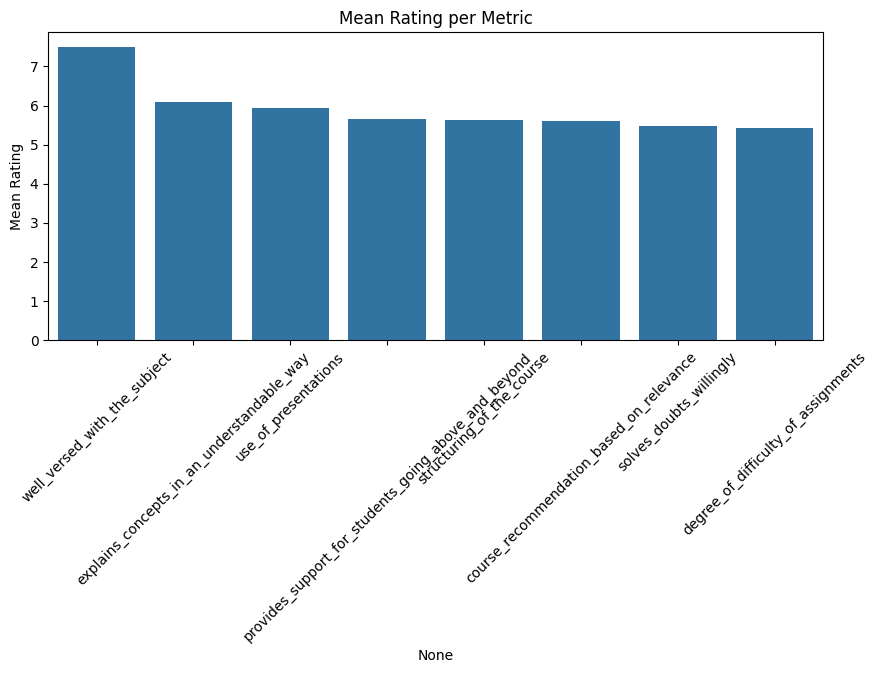

In [12]:
# Cell 11: mean rating by metric
means = df[cols].mean().sort_values(ascending=False)
print("Mean rating by metric:")
display(means)

plt.figure(figsize=(10,4))
sns.barplot(x=means.index, y=means.values)
plt.xticks(rotation=45)
plt.ylabel("Mean Rating")
plt.title("Mean Rating per Metric")
plt.show()


In [13]:
# Cell 12: save results for download in Colab
summary_table = pd.DataFrame({
    'metric': means.index,
    'mean_rating': means.values,
    'std_rating': df[cols].std().reindex(means.index).values
})
summary_table.to_csv('metric_summary.csv', index=False)
df.to_csv('annotated_student_feedback.csv', index=False)

print("Saved files: metric_summary.csv and annotated_student_feedback.csv")
# If you want to download them:
from google.colab import files
files.download('metric_summary.csv')
files.download('annotated_student_feedback.csv')

Saved files: metric_summary.csv and annotated_student_feedback.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>